# Capstone Final Project: Location for a Chinese restaurant in Toronto¶

## Table of contents
* [Introduction](#introduction)
* [Business Problem](#BusinessProblem)
* [Data](#data)
* [Analysis](#analysis)
* [Conclusion](#conclusion)

### 1. Introduction<a name="introduction"></a>

The purpose of this Project is to find a better location for a chinese restaurant to open in Toronto. Toronto is the capital city of the Canadian province of Ontario. It is the most populous city in Canada and the fourth most populous city in North America. The diverse population of Toronto, which means it's gonna be a wide variety of food there，everyone loves good food.  

So there are multiple opportunities for investors in Toronto. First, a lot of Chinese people living in Toronto. Second, Chinese food is a very popular Asian cuisine. Last but not least, there may not be enough good chinese restaurants in certain area.

### 2. Business Problem<a name="BusinessProblem"></a>

The aim is suggest a better location for entrepreneur to open a chinese restaurant. There are many problems we need to consider.

* Which neighborhood has the most Chinese people?
* Is there already a similar Chinese restaurant around?
* Who are the competitors in that area? ...... \
By using data science methonds and machine learning techniques, I think the answer will become clearer as the project progresses.

Based on the above, our target customer is clear： Entrepreneurs who want to open a chinese restaurant in Toronto.

### 3.1  Data<a name="data"></a>

To solve this project, we need to use data from: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M \
This wikipedia page has information about all the neighborhoods that we need.

* Postal Code:  Postal codes for Toronto
* Borough: Name of Neighborhood
* Neighborhood

Maybe we can also take population distribution into account:  https://en.wikipedia.org/wiki/Demographics_of_Toronto

Finally, the data we got from last week: Geospatial_Coordinates.csv \
This csv file will give us the latitude and longitude of these neighborhoods.

### 3.2 Foursquare API Data

In addition to the above data， we will need data about different venues in different neighborhoods of that specific borough. In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

In conclusion, we need to explore neighborhoods, segment them, and group them into clusters to find some similarity. To be able to do that, we need to cluster data which is a form of unsupervised machine learning, so we choose k-means clustering here.

### 3.3  Libraries

* matplotlib: for generate maps and data visualization 
* numpy: handle data in a vectorized manner
* pandas: for data analysis
* sklearn: for machine learning
* json: handle JSON files
 ...

### 4.  Data Analysis<a name="analysis"></a>

This part we will perform data cleaning

Let's first import Libraries

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

get data

Let's start by looking at the population distribution of each Borough

In [2]:
popu = requests.get('https://en.wikipedia.org/wiki/Demographics_of_Toronto')

In [3]:
df_popu = pd.read_html(popu.content)[4]
df_popu.head()

,Top 20 Ethnic origins in the City of Toronto,Population (2016)[33],Percentage,Riding with Highest Concentration,Percentage.1
0,Chinese,332830,12.5,Scarborough—Agincourt,47.0
1,English,331890,12.3,Beaches—East York,24.2
2,Canadian,323175,12.0,Beaches-East York,19.7
3,Irish,262965,9.8,Parkdale—High Park,20.0
4,Scottish,256250,9.5,Beaches—East York,18.9


It seems that Scarborough has the highest percentage of Chinese people, so we can focus our analysis here next.

In [4]:
wiki_Toro = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [5]:
df_Toro = pd.read_html(wiki_Toro.content)[0]

check if exists a cell has a borough but a "Not assigned" neighborhood

In [6]:
df_Toro[df_Toro.Neighbourhood == 'Not assigned'].Borough.unique()

array(['Not assigned'], dtype=object)

In [7]:
df_Toro = df_Toro[df_Toro.Neighbourhood != 'Not assigned']

In [8]:
df_Toro.reset_index(inplace=True,drop=True)

In [9]:
df_Toro.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [10]:
df_Toro.shape

(103, 3)

In [11]:
df_scar = df_Toro[df_Toro.Borough == 'Scarborough'].reset_index(drop=True)

In [12]:
df_scar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Postal Code    17 non-null     object
 1   Borough        17 non-null     object
 2   Neighbourhood  17 non-null     object
dtypes: object(3)
memory usage: 536.0+ bytes


get the data of Latitude and Longitude

In [13]:
df_geo = pd.read_csv('Geospatial_Coordinates.csv')
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
df = pd.merge(df_scar,df_geo,on='Postal Code') #join the two dataframes
df.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True) 
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [15]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent="scar_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


draw the map

In [16]:
import folium
map_scar = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df['Latitude'], df['Longitude'],df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_scar)  
    
map_scar

Define Foursquare Credentials and Version

In [17]:
CLIENT_ID = 'DXYK5UDASQ1AMYLZWO0AG2EBGFTJSPLOZNGXBVV0P1Z0BM2X' # your Foursquare ID
CLIENT_SECRET = 'OV2MJWHKTWO0N23PQQGGBKJ4GBJ04XU30H0ZZ1HRIIY5CYKN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DXYK5UDASQ1AMYLZWO0AG2EBGFTJSPLOZNGXBVV0P1Z0BM2X
CLIENT_SECRET:OV2MJWHKTWO0N23PQQGGBKJ4GBJ04XU30H0ZZ1HRIIY5CYKN


get the top 100 venues that are in Scarborough within a radius of 2000 meters.

In [18]:
query = 'restaurant'
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    query)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=DXYK5UDASQ1AMYLZWO0AG2EBGFTJSPLOZNGXBVV0P1Z0BM2X&client_secret=OV2MJWHKTWO0N23PQQGGBKJ4GBJ04XU30H0ZZ1HRIIY5CYKN&v=20180604&ll=43.773077,-79.257774&radius=2000&limit=100&query=restaurant'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb56f2ff2dca11a89a7a289'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Scarborough City Centre',
  'headerFullLocation': 'Scarborough City Centre, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'restaurant',
  'totalResults': 82,
  'suggestedBounds': {'ne': {'lat': 43.79107701800002,
    'lng': -79.23289271818858},
   'sw': {'lat': 43.755076981999984, 'lng': -79.28265528181142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d6008f829ef236a8832a059',
       'name': 'CANBE Foods Inc',
       'location': {'address': '1760 Ellesmere Rd.',
        'lat': 43.77354633117736,
        'lng': -79.24608237285928,
        'labe

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.neighborhood',
       'venue.venuePage.id'],
      dtype='object')

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,CANBE Foods Inc,Indian Restaurant,43.773546,-79.246082
1,St. Andrews Fish & Chips,Fish & Chips Shop,43.771865,-79.252645
2,Chipotle Mexican Grill,Mexican Restaurant,43.776410,-79.258069
3,Fukuoka Sushi,Sushi Restaurant,43.780679,-79.247320
4,The Roti Hut,Caribbean Restaurant,43.787277,-79.258724
5,Cora's,Breakfast Spot,43.783417,-79.253107
6,Federick Restaurant,Hakka Restaurant,43.774697,-79.241142
7,Ni-Ji,Japanese Restaurant,43.767625,-79.271399
8,Jack Astor's Bar & Grill,Restaurant,43.777502,-79.254554
9,Scaddabush Italian Kitchen & Bar,Italian Restaurant,43.777460,-79.254358


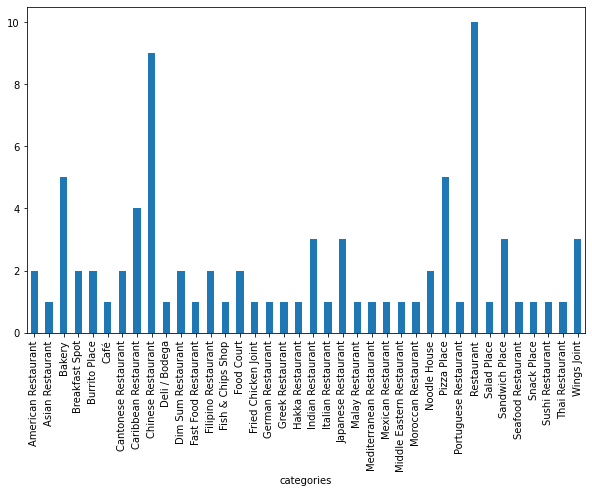

In [24]:
plt.figure(figsize=(10,6))
nearby_venues.groupby('categories').count()['name'].plot(kind='bar')

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            query)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
scar_restaurant = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


check the number of venues were returned for each neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

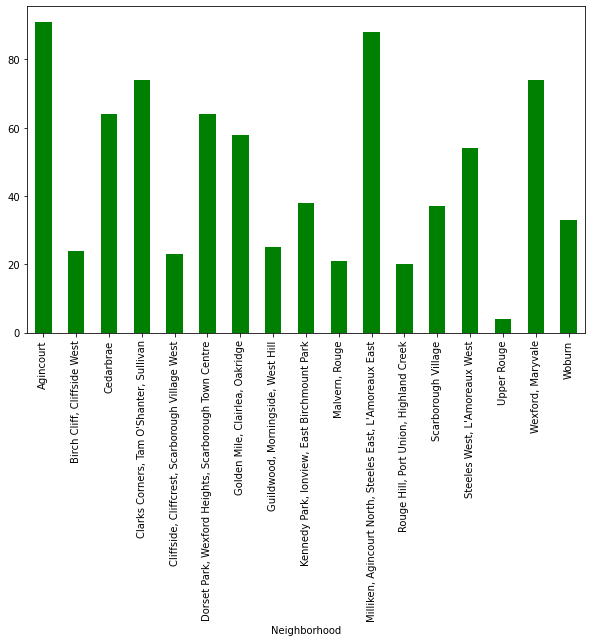

In [27]:
plt.figure(figsize=(10,6))
scar_restaurant.groupby('Neighborhood').count()['Venue'].plot(kind='bar',color='green')
plt.xticks(rotation='vertical')

In [28]:
scar_restaurant.groupby('Neighborhood').count()['Venue'].sort_values()

Neighborhood
Upper Rouge                                                  4
Rouge Hill, Port Union, Highland Creek                      20
Malvern, Rouge                                              21
Cliffside, Cliffcrest, Scarborough Village West             23
Birch Cliff, Cliffside West                                 24
Guildwood, Morningside, West Hill                           25
Woburn                                                      33
Scarborough Village                                         37
Kennedy Park, Ionview, East Birchmount Park                 38
Steeles West, L'Amoreaux West                               54
Golden Mile, Clairlea, Oakridge                             58
Dorset Park, Wexford Heights, Scarborough Town Centre       64
Cedarbrae                                                   64
Clarks Corners, Tam O'Shanter, Sullivan                     74
Wexford, Maryvale                                           74
Milliken, Agincourt North, Steeles East, L

In [29]:
scar_restaurant.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,91,91,91,91,91,91
"Birch Cliff, Cliffside West",24,24,24,24,24,24
Cedarbrae,64,64,64,64,64,64
"Clarks Corners, Tam O'Shanter, Sullivan",74,74,74,74,74,74
"Cliffside, Cliffcrest, Scarborough Village West",23,23,23,23,23,23
"Dorset Park, Wexford Heights, Scarborough Town Centre",64,64,64,64,64,64
"Golden Mile, Clairlea, Oakridge",58,58,58,58,58,58
"Guildwood, Morningside, West Hill",25,25,25,25,25,25
"Kennedy Park, Ionview, East Birchmount Park",38,38,38,38,38,38


### One hot encoding 

In [30]:
scar_onehot = pd.get_dummies(scar_restaurant[['Venue Category']], prefix="", prefix_sep="")

scar_onehot['Neighborhood'] = scar_restaurant['Neighborhood'] 

fixed_columns = [scar_onehot.columns[-1]] + list(scar_onehot.columns[:-1])
scar_onehot = scar_onehot[fixed_columns]

scar_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hakka Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Noodle House,Pizza Place,Portuguese Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Snack Place,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Xinjiang Restaurant
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
scar_onehot.shape

(792, 67)

In [32]:
scar_grouped = scar_onehot.groupby('Neighborhood').mean().reset_index()
scar_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hakka Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Noodle House,Pizza Place,Portuguese Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Snack Place,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Xinjiang Restaurant
0,Agincourt,0.010989,0.000000,0.032967,0.010989,0.000000,0.054945,0.010989,0.021978,0.000000,0.000000,0.000000,0.000000,0.032967,0.043956,0.197802,0.000000,0.000000,0.010989,0.010989,0.00,0.000000,0.000000,0.032967,0.021978,0.000000,0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,0.000000,0.010989,0.000000,0.000000,0.043956,0.010989,0.021978,0.010989,0.010989,0.010989,0.010989,0.010989,0.000000,0.000000,0.010989,0.043956,0.000000,0.131868,0.010989,0.021978,0.010989,0.010989,0.000000,0.010989,0.000000,0.043956,0.000000,0.000000,0.000000,0.000000,0.000000,0.032967,0.010989,0.000000
1,"Birch Cliff, Cliffside West",0.000000,0.000000,0.041667,0.083333,0.000000,0.041667,0.000000,0.041667,0.041667,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.083333,0.00,0.000000,0.000000,0.041667,0.041667,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cedarbrae,0.000000,0.000000,0.031250,0.000000,0.000000,0.046875,0.015625,0.015625,0.015625,0.000000,0.000000,0.000000,0.000000,0.031250,0.046875,0.000000,0.015625,0.015625,0.031250,0.00,0.000000,0.000000,0.062500,0.015625,0.015625,0.031250,0.000000,0.000000,0.015625,0.000000,0.015625,0.015625,0.015625,0.000000,0.000000,0.000000,0.078125,0.015625,0.015625,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.015625,0.000000,0.062500,0.000000,0.171875,0.015625,0.031250,0.000000,0.000000,0.015625,0.000000,0.000000,0.015625,0.015625,0.000000,0.015625,0.000000,0.000000,0.015625,0.031250,0.015625
3,"Clarks Corners, Tam O'Shanter, Sullivan",0.000000,0.013514,0.013514,0.000000,0.000000,0.054054,0.000000,0.027027,0.013514,0.027027,0.000000,0.000000,0.013514,0.040541,0.121622,0.000000,0.027027,0.000000,0.000000,0.00,0.000000,0.040541,0.094595,0.000000,0.000000,0.000000,0.013514,0.013514,0.013514,0.000000,0.000000,0.027027,0.013514,0.000000,0.013514,0.000000,0.000000,0.013514,0.040541,0.013514,0.000000,0.000000,0.000000,0.013514,0.013514,0.000000,0.013514,0.108108,0.000000,0.094595,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.013514,0.013514,0.000000,0.000000,0.040541,0.000000,0.000000
4,"Cliffside, Cliffcrest, Scarborough Village West",0.000000,0.000000,0.043478,0.043478,0.000000,0.043478,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [33]:
scar_grouped.shape

(17, 67)

In [34]:
num_top_venues = 5

for hood in scar_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scar_grouped[scar_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                venue  freq
0  Chinese Restaurant  0.20
1          Restaurant  0.13
2              Bakery  0.05
3    Sushi Restaurant  0.04
4         Pizza Place  0.04


----Birch Cliff, Cliffside West----
               venue  freq
0         Restaurant  0.17
1        Pizza Place  0.12
2  Fish & Chips Shop  0.08
3               Café  0.08
4   Asian Restaurant  0.08


----Cedarbrae----
                  venue  freq
0            Restaurant  0.17
1     Indian Restaurant  0.08
2  Fast Food Restaurant  0.06
3           Pizza Place  0.06
4                Bakery  0.05


----Clarks Corners, Tam O'Shanter, Sullivan----
                  venue  freq
0    Chinese Restaurant  0.12
1           Pizza Place  0.11
2  Fast Food Restaurant  0.09
3            Restaurant  0.09
4                Bakery  0.05


----Cliffside, Cliffcrest, Scarborough Village West----
                venue  freq
0         Pizza Place  0.22
1          Restaurant  0.17
2  Chinese Restaurant  0.09
3         Snac

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scar_grouped['Neighborhood']

for ind in np.arange(scar_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scar_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Restaurant,Bakery,Sushi Restaurant,Pizza Place,Indian Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Fast Food Restaurant,American Restaurant
1,"Birch Cliff, Cliffside West",Restaurant,Pizza Place,Café,Asian Restaurant,Fish & Chips Shop,Diner,Chinese Restaurant,Filipino Restaurant,Breakfast Spot,Burger Joint
2,Cedarbrae,Restaurant,Indian Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Chinese Restaurant,American Restaurant,Wings Joint,Caribbean Restaurant,Diner
3,"Clarks Corners, Tam O'Shanter, Sullivan",Chinese Restaurant,Pizza Place,Fast Food Restaurant,Restaurant,Bakery,Vietnamese Restaurant,Falafel Restaurant,Caribbean Restaurant,Japanese Restaurant,Burrito Place
4,"Cliffside, Cliffcrest, Scarborough Village West",Pizza Place,Restaurant,Chinese Restaurant,Breakfast Spot,Gastropub,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Fish & Chips Shop
5,"Dorset Park, Wexford Heights, Scarborough Town...",Restaurant,Fast Food Restaurant,Pizza Place,Asian Restaurant,Filipino Restaurant,Breakfast Spot,Chinese Restaurant,Indian Restaurant,American Restaurant,Bakery
6,"Golden Mile, Clairlea, Oakridge",Restaurant,Fast Food Restaurant,Chinese Restaurant,Bakery,Pizza Place,Burger Joint,Indian Restaurant,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant
7,"Guildwood, Morningside, West Hill",Pizza Place,Restaurant,Breakfast Spot,Greek Restaurant,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Filipino Restaurant,Indian Restaurant,Asian Restaurant
8,"Kennedy Park, Ionview, East Birchmount Park",Chinese Restaurant,Fast Food Restaurant,Pizza Place,Restaurant,Sandwich Place,Wings Joint,Deli / Bodega,Burger Joint,Caribbean Restaurant,Greek Restaurant
9,"Malvern, Rouge",Fast Food Restaurant,Restaurant,African Restaurant,Pizza Place,Caribbean Restaurant,Chinese Restaurant,Café,Fried Chicken Joint,Mediterranean Restaurant,Sandwich Place


In [38]:
kclusters = 5
scar_grouped_clustering = scar_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scar_grouped_clustering)

kmeans.labels_

array([0, 2, 2, 0, 3, 2, 2, 3, 0, 4, 0, 3, 4, 0, 1, 2, 4], dtype=int32)

In [39]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

scar_merged = df

scar_merged = scar_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

scar_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4,Fast Food Restaurant,Restaurant,African Restaurant,Pizza Place,Caribbean Restaurant,Chinese Restaurant,Café,Fried Chicken Joint,Mediterranean Restaurant,Sandwich Place
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,3,Breakfast Spot,Pizza Place,Restaurant,Bakery,Burger Joint,Fish & Chips Shop,Italian Restaurant,Japanese Restaurant,Diner,Mexican Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,3,Pizza Place,Restaurant,Breakfast Spot,Greek Restaurant,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Filipino Restaurant,Indian Restaurant,Asian Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,4,Pizza Place,Fast Food Restaurant,Restaurant,Indian Restaurant,Chinese Restaurant,Burger Joint,Filipino Restaurant,Czech Restaurant,Caribbean Restaurant,Fried Chicken Joint
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2,Restaurant,Indian Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Chinese Restaurant,American Restaurant,Wings Joint,Caribbean Restaurant,Diner


Now we will apply K-means clustering on the dataframe.

In [42]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(scar_merged['Latitude'], scar_merged['Longitude'], scar_merged['Neighborhood'], scar_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

lets have a look at all five clusters.

In [43]:
scar_merged.loc[scar_merged['Cluster Labels'] == 0, scar_merged.columns[[1] + list(range(5, scar_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,0,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Restaurant,Sandwich Place,Wings Joint,Deli / Bodega,Burger Joint,Caribbean Restaurant,Greek Restaurant
12,Scarborough,0,Chinese Restaurant,Restaurant,Bakery,Sushi Restaurant,Pizza Place,Indian Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Fast Food Restaurant,American Restaurant
13,Scarborough,0,Chinese Restaurant,Pizza Place,Fast Food Restaurant,Restaurant,Bakery,Vietnamese Restaurant,Falafel Restaurant,Caribbean Restaurant,Japanese Restaurant,Burrito Place
14,Scarborough,0,Chinese Restaurant,Japanese Restaurant,BBQ Joint,Vietnamese Restaurant,Korean Restaurant,Noodle House,Bakery,Pizza Place,Restaurant,Dumpling Restaurant
15,Scarborough,0,Chinese Restaurant,Pizza Place,Bakery,Japanese Restaurant,Vietnamese Restaurant,Caribbean Restaurant,Restaurant,Breakfast Spot,Korean Restaurant,Indian Restaurant


In [44]:
scar_merged.loc[scar_merged['Cluster Labels'] == 1, scar_merged.columns[[1] + list(range(5, scar_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Scarborough,1,Latin American Restaurant,Donut Shop,Asian Restaurant,Pizza Place,Xinjiang Restaurant,Diner,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop


In [45]:
scar_merged.loc[scar_merged['Cluster Labels'] == 2, scar_merged.columns[[1] + list(range(5, scar_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Scarborough,2,Restaurant,Indian Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Chinese Restaurant,American Restaurant,Wings Joint,Caribbean Restaurant,Diner
7,Scarborough,2,Restaurant,Fast Food Restaurant,Chinese Restaurant,Bakery,Pizza Place,Burger Joint,Indian Restaurant,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant
9,Scarborough,2,Restaurant,Pizza Place,Café,Asian Restaurant,Fish & Chips Shop,Diner,Chinese Restaurant,Filipino Restaurant,Breakfast Spot,Burger Joint
10,Scarborough,2,Restaurant,Fast Food Restaurant,Pizza Place,Asian Restaurant,Filipino Restaurant,Breakfast Spot,Chinese Restaurant,Indian Restaurant,American Restaurant,Bakery
11,Scarborough,2,Restaurant,Asian Restaurant,Indian Restaurant,Middle Eastern Restaurant,Pizza Place,American Restaurant,Chinese Restaurant,Burger Joint,Vietnamese Restaurant,Breakfast Spot


In [46]:
scar_merged.loc[scar_merged['Cluster Labels'] == 3, scar_merged.columns[[1] + list(range(5, scar_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,3,Breakfast Spot,Pizza Place,Restaurant,Bakery,Burger Joint,Fish & Chips Shop,Italian Restaurant,Japanese Restaurant,Diner,Mexican Restaurant
2,Scarborough,3,Pizza Place,Restaurant,Breakfast Spot,Greek Restaurant,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Filipino Restaurant,Indian Restaurant,Asian Restaurant
8,Scarborough,3,Pizza Place,Restaurant,Chinese Restaurant,Breakfast Spot,Gastropub,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Fish & Chips Shop


In [47]:
scar_merged.loc[scar_merged['Cluster Labels'] == 4, scar_merged.columns[[1] + list(range(5, scar_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,4,Fast Food Restaurant,Restaurant,African Restaurant,Pizza Place,Caribbean Restaurant,Chinese Restaurant,Café,Fried Chicken Joint,Mediterranean Restaurant,Sandwich Place
3,Scarborough,4,Pizza Place,Fast Food Restaurant,Restaurant,Indian Restaurant,Chinese Restaurant,Burger Joint,Filipino Restaurant,Czech Restaurant,Caribbean Restaurant,Fried Chicken Joint
5,Scarborough,4,Fast Food Restaurant,Pizza Place,Restaurant,Chinese Restaurant,Sandwich Place,Wings Joint,Indian Restaurant,Diner,Breakfast Spot,Fish & Chips Shop


### 5 Conclusion<a name="conclusion"></a>

Finally, the project is done. First, I use population distribution that I got from wikipedia to check which Borough has the most Chinese people. Obviously, it's Scarborough. This narrows down the scope. Then use Foursquare find the exact location of the restaurant, and the corresponding neighborhood. After that, I use k-means clustering to cluster the neighborhood into 5 clusters, from the above 5 clusters we can learn that cluster 4 looks like a good location for starting a chinese restaurant.

## Thank you for you time!